<a href="https://colab.research.google.com/github/gibrankun/UAS_DS_BENGKOD/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import lib yang perlu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
file_path = '/content/water_potability.csv'
water_data = pd.read_csv(file_path)

In [5]:
water_data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [6]:
# Menampilkan informasi dari dataset
print(f"Jumlah Baris: {len(water_data)}\n")
print("Tipe Data Tiap Kolom:")
print(water_data.dtypes, "\n")

print("Jumlah Nilai Unik Tiap Kolom:")
for column in water_data.columns:
    print(f"{column}: {water_data[column].nunique()} nilai unik")


Jumlah Baris: 3276

Tipe Data Tiap Kolom:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object 

Jumlah Nilai Unik Tiap Kolom:
ph: 2785 nilai unik
Hardness: 3276 nilai unik
Solids: 3276 nilai unik
Chloramines: 3276 nilai unik
Sulfate: 2495 nilai unik
Conductivity: 3276 nilai unik
Organic_carbon: 3276 nilai unik
Trihalomethanes: 3114 nilai unik
Turbidity: 3276 nilai unik
Potability: 2 nilai unik


Jumlah Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Jumlah Missing Values Setelah Imputasi:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


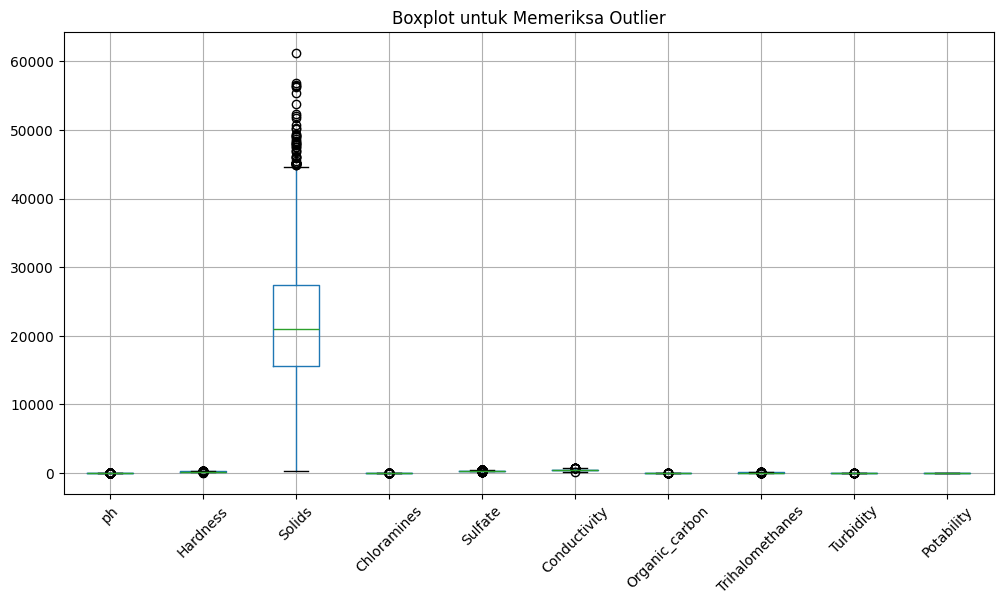

In [7]:
# Cek jumlah missing values di setiap kolom
print("Jumlah Missing Values:")
print(water_data.isnull().sum())

# Imputasi missing values dengan rata-rata
water_data.fillna(water_data.mean(), inplace=True)

# Cek ulang missing values setelah imputasi
print("\nJumlah Missing Values Setelah Imputasi:")
print(water_data.isnull().sum())

# Identifikasi outliers menggunakan boxplot
plt.figure(figsize=(12, 6))
water_data.boxplot()
plt.title("Boxplot untuk Memeriksa Outlier")
plt.xticks(rotation=45)
plt.show()

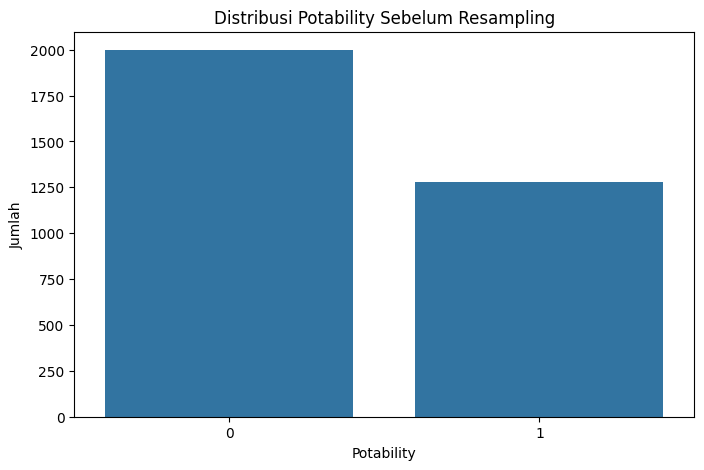

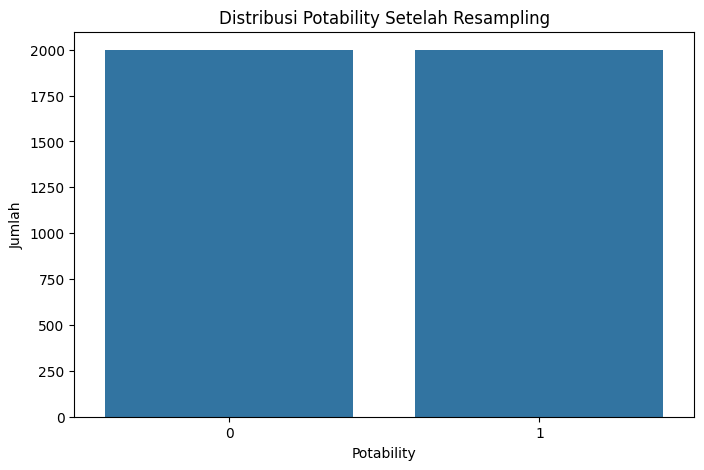

In [8]:
# Distribusi Potability sebelum resampling
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=water_data)
plt.title("Distribusi Potability Sebelum Resampling")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.show()

# Resampling untuk mengatasi ketidakseimbangan kelas
from sklearn.utils import resample

# Pisahkan kelas mayoritas dan minoritas
majority = water_data[water_data.Potability == 0]
minority = water_data[water_data.Potability == 1]

# Oversampling kelas minoritas
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# Gabungkan kembali dataset yang telah diresampling
water_data_resampled = pd.concat([majority, minority_oversampled])

# Distribusi Potability setelah resampling
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=water_data_resampled)
plt.title("Distribusi Potability Setelah Resampling")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.show()


In [9]:
# Menentukan fitur (X) dan target (y)
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

# Memisahkan fitur dan target
X = water_data[features]
y = water_data[target]

# Menampilkan dimensi fitur dan target
print(f"Dimensi Fitur (X): {X.shape}")
print(f"Dimensi Target (y): {y.shape}")

# Menampilkan beberapa baris pertama fitur dan target
print("\nFitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Dimensi Fitur (X): (3276, 9)
Dimensi Target (y): (3276,)

Fitur (X):
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436524       100.341674   4.628771  
4       11.558279        31.997993   4.075075  

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


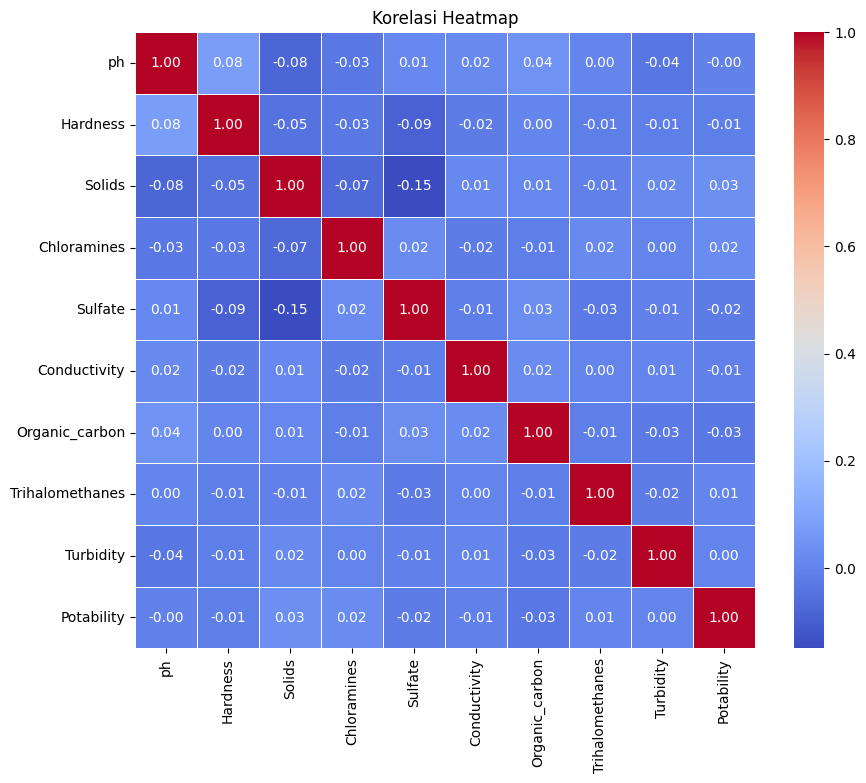

In [10]:
# Menghitung matriks korelasi
correlation_matrix = water_data.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Heatmap")
plt.show()

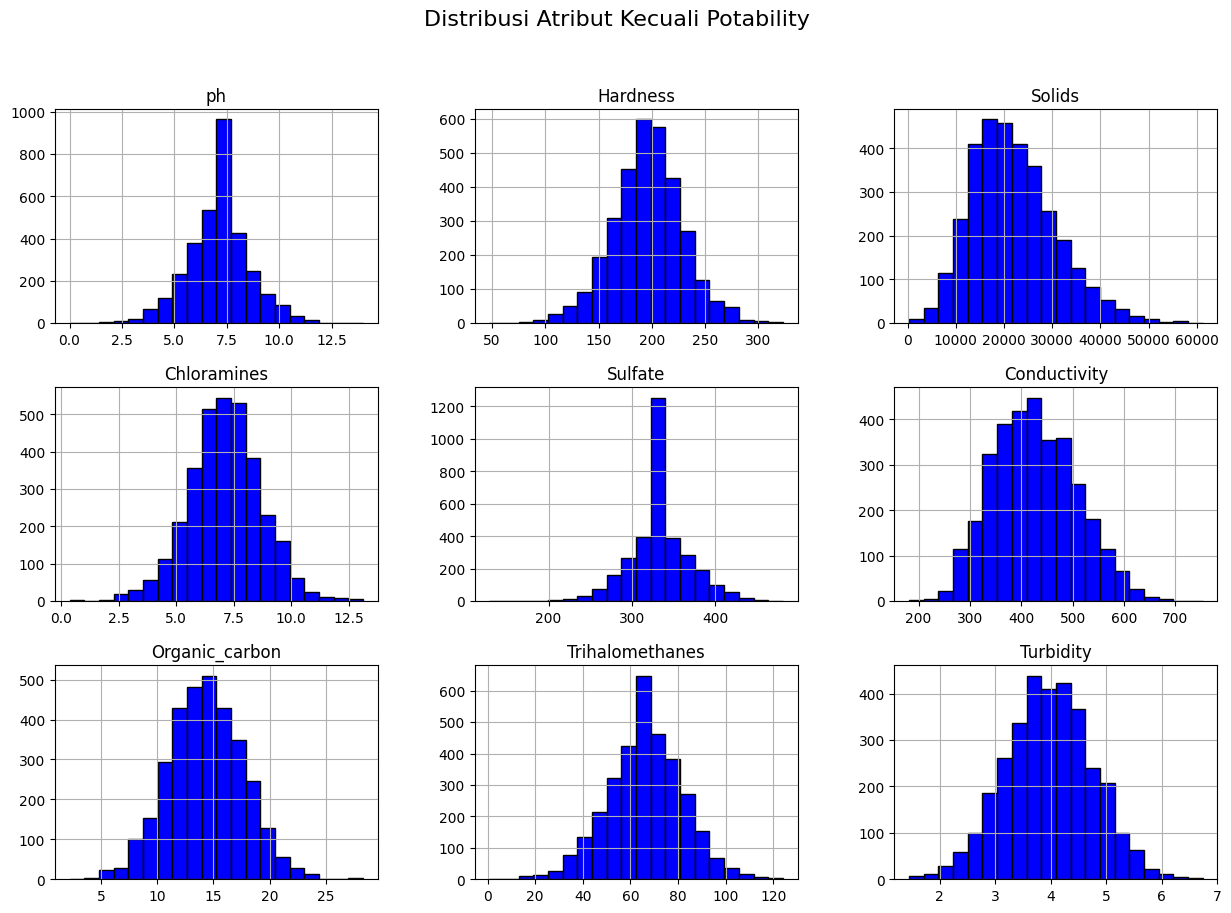

In [11]:
# Visualisasi distribusi tiap atribut kecuali 'Potability'
columns_to_plot = [col for col in water_data.columns if col != 'Potability']

# Membuat histogram untuk setiap fitur
water_data[columns_to_plot].hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Distribusi Atribut Kecuali Potability", fontsize=16)
plt.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Normalisasi fitur
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Konversi hasil normalisasi menjadi DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Menampilkan beberapa baris pertama dari fitur yang sudah dinormalisasi
print("Fitur setelah Normalisasi:")
print(X_normalized.head())

Fitur setelah Normalisasi:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327  


In [13]:
# Pembagian data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data hasil pembagian
print(f"Dimensi Data Latih: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensi Data Uji: X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensi Data Latih: X_train: (2620, 9), y_train: (2620,)
Dimensi Data Uji: X_test: (656, 9), y_test: (656,)



Model: Logistic Regression
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       412
           1       0.37      0.48      0.42       244

    accuracy                           0.50       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.50      0.51       656



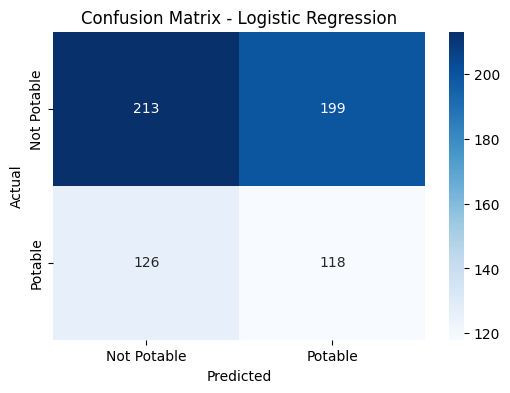


Model: Random Forest
Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.64      0.32      0.43       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.60       656
weighted avg       0.67      0.68      0.65       656



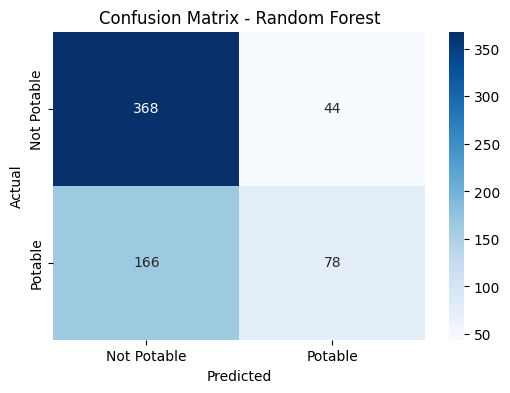


Model: Naive Bayes
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       412
           1       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656



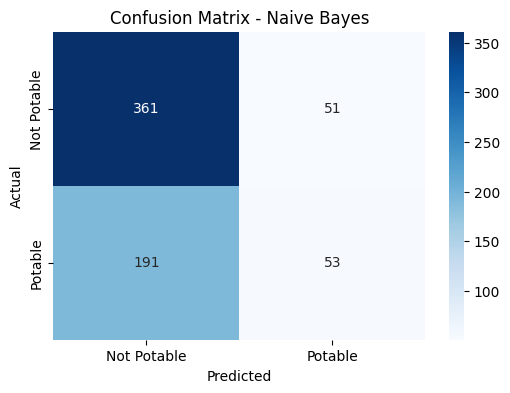

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Naive Bayes": GaussianNB()
}

# Pelatihan dan evaluasi
for model_name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [15]:
# Pembagian data latih dan uji sebelum normalisasi
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Inisialisasi model dengan penanganan untuk data tidak seimbang
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Naive Bayes": GaussianNB()
}

# Evaluasi sebelum normalisasi
print("Hasil Evaluasi Sebelum Normalisasi:\n")
accuracy_before = {}
for model_name, model in models.items():
    # Latih model
    model.fit(X_train_original, y_train_original)

    # Prediksi
    y_pred_original = model.predict(X_test_original)

    # Akurasi
    accuracy = accuracy_score(y_test_original, y_pred_original)
    accuracy_before[model_name] = accuracy
    print(f"Model: {model_name} - Accuracy: {accuracy:.2f}")

Hasil Evaluasi Sebelum Normalisasi:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression - Accuracy: 0.51
Model: Random Forest - Accuracy: 0.68
Model: Naive Bayes - Accuracy: 0.63


In [16]:
# Evaluasi setelah normalisasi
print("\nHasil Evaluasi Setelah Normalisasi:\n")
accuracy_after = {}
for model_name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred_normalized = model.predict(X_test)

    # Akurasi
    accuracy = accuracy_score(y_test, y_pred_normalized)
    accuracy_after[model_name] = accuracy
    print(f"Model: {model_name} - Accuracy: {accuracy:.2f}")


Hasil Evaluasi Setelah Normalisasi:

Model: Logistic Regression - Accuracy: 0.50
Model: Random Forest - Accuracy: 0.68
Model: Naive Bayes - Accuracy: 0.63


In [17]:
# Membandingkan hasil akurasi
print("\nPerbandingan Akurasi:\n")
comparison = pd.DataFrame({
    "Model": models.keys(),
    "Accuracy Sebelum Normalisasi": [accuracy_before[m] for m in models.keys()],
    "Accuracy Setelah Normalisasi": [accuracy_after[m] for m in models.keys()]
})
print(comparison)


Perbandingan Akurasi:

                 Model  Accuracy Sebelum Normalisasi  \
0  Logistic Regression                      0.510671   
1        Random Forest                      0.679878   
2          Naive Bayes                      0.631098   

   Accuracy Setelah Normalisasi  
0                      0.504573  
1                      0.679878  
2                      0.631098  


In [25]:
!pip install streamlit  --quiet

In [26]:
%%writefile UAS.py
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Streamlit App Title
st.title("Evaluasi Model Machine Learning")

# Data Upload
uploaded_file = st.file_uploader("Upload dataset Anda (CSV)", type="csv")
if uploaded_file is not None:
    # Load dataset
    data = pd.read_csv(uploaded_file)
    st.write("Dataset Preview:")
    st.write(data.head())

    # Input features dan target
    features = st.multiselect("Pilih fitur (X):", data.columns.tolist())
    target = st.selectbox("Pilih target (y):", data.columns.tolist())

    if features and target:
        X = data[features]
        y = data[target]

        # Pembagian data
        X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Normalisasi
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train_original)
        X_test = scaler.transform(X_test_original)

        # Model
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
            "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
            "Naive Bayes": GaussianNB()
        }

        # Evaluasi Model
        st.write("## Hasil Evaluasi Model")
        for model_name, model in models.items():
            model.fit(X_train, y_train_original)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test_original, y_pred)

            st.write(f"### Model: {model_name}")
            st.write(f"**Accuracy:** {accuracy:.2f}")
            st.text("Classification Report:")
            st.text(classification_report(y_test_original, y_pred, zero_division=0))

            # Confusion Matrix
            cm = confusion_matrix(y_test_original, y_pred)
            fig, ax = plt.subplots(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
            plt.title(f"Confusion Matrix - {model_name}")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            st.pyplot(fig)


Writing UAS.py


In [ ]:
!streamlit run UAS.py & npx localtunnel --port 8501

1. Tingkat Akurasi Setiap Algoritma
Logistic Regression: 0.51 (51%)
Tingkat akurasi ini menunjukkan bahwa Logistic Regression kurang efektif dalam menangkap pola dari data.
Random Forest: 0.68 (68%)
Random Forest memberikan performa terbaik di antara algoritma lainnya, menunjukkan kemampuannya dalam menangkap pola yang kompleks.
Naive Bayes: 0.63 (63%)
Naive Bayes memberikan akurasi yang lebih baik dibandingkan Logistic Regression tetapi masih lebih rendah dibandingkan Random Forest.

2. Keunggulan dan Keterbatasan Algoritma
Logistic Regression:
Keunggulan:
Sederhana dan cepat dalam pelatihan.
Cocok untuk data linier atau hampir linier.
Keterbatasan:
Kurang efektif pada data yang memiliki hubungan non-linier antara fitur dan target.
Sensitif terhadap outlier.

Random Forest:
Keunggulan:
Mampu menangkap hubungan non-linier dengan baik.
Tahan terhadap overfitting, terutama pada dataset yang besar.
Secara otomatis menangani interaksi antar fitur.
Keterbatasan:
Memerlukan lebih banyak sumber daya komputasi dibandingkan Logistic Regression.
Tidak memberikan interpretasi yang mudah dibandingkan model linier.

Naive Bayes:
Keunggulan:
Cepat dan efisien pada dataset besar.
Cocok untuk data dengan asumsi independensi antar fitur.
Keterbatasan:
Kinerja menurun jika fitur saling bergantung (violasi asumsi independensi).
Rentan terhadap fitur yang memiliki distribusi non-Gaussian.

3. Rekomendasi Algoritma yang Paling Efektif
Rekomendasi: Random Forest
Alasan:
Random Forest memberikan akurasi tertinggi (68%) dibandingkan algoritma lain.
Mampu menangkap pola yang lebih kompleks dibandingkan Logistic Regression dan Naive Bayes.
Tahan terhadap overfitting dan robust terhadap outlier.
Cocok untuk data dengan hubungan non-linier antar fitur, yang mungkin ada pada dataset ini.
